# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_num = mouse_data_df["Mouse ID"].nunique()
mouse_num

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = mouse_data_df[mouse_data_df["Mouse ID"] == "g989"]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_new = mouse_data_df[mouse_data_df["Mouse ID"].isin(mouse_duplicate) == False]
mouse_data_new.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_num_new = len(mouse_data_new["Mouse ID"].unique())
mouse_num_new

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

per_drug_tumor_mean = mouse_data_new.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
per_drug_tumor_median = mouse_data_new.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
per_drug_tumor_var = mouse_data_new.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
per_drug_tumor_std = mouse_data_new.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
per_drug_tumor_std_error = mouse_data_new.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

df = {"Mean Tumor Volume": per_drug_tumor_mean,
      "Median Tumor Volume": per_drug_tumor_median,
      "Tumor Volume Variance": per_drug_tumor_var,
      "Tumor Volume Std. Dev.": per_drug_tumor_std,
      "Tumor Volume Std. Err.": per_drug_tumor_std_error}

df = pd.DataFrame(df)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

mouse_data_new.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

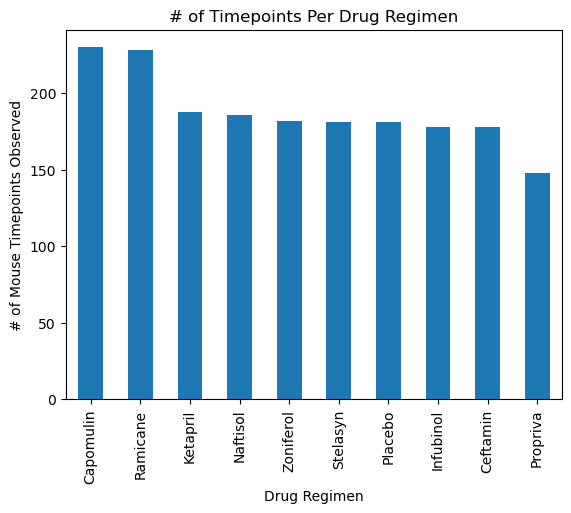

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

df2 = mouse_data_new["Drug Regimen"].value_counts()

df2.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "# of Mouse Timepoints Observed", title = "# of Timepoints Per Drug Regimen")
plt.show()

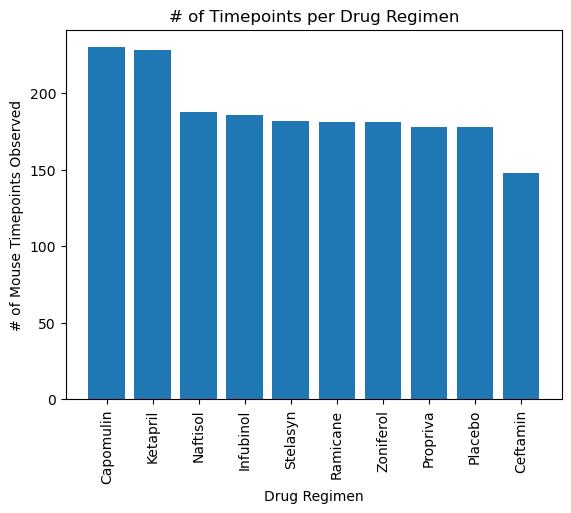

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_data_new["Drug Regimen"].unique()
y_axis = mouse_data_new["Drug Regimen"].value_counts()

plt.bar(x_axis, y_axis)
plt.title("# of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mouse Timepoints Observed")
plt.xticks(rotation = "vertical")
plt.show()

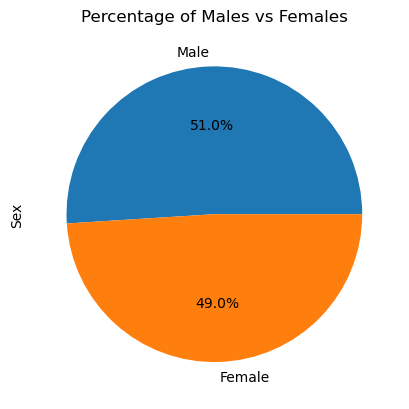

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_sex_mice = mouse_data_new["Sex"].count()
df3 = round(mouse_data_new["Sex"].value_counts() / total_sex_mice * 100, 1)

df3.plot(kind = "pie", autopct='%1.1f%%', title = "Percentage of Males vs Females")
plt.show()

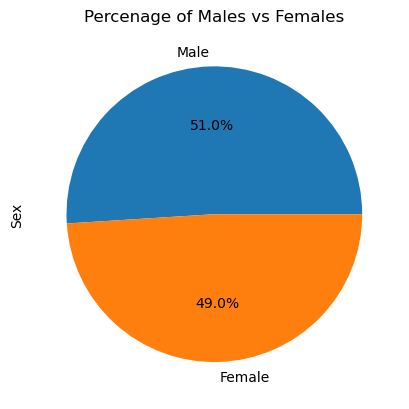

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex = "Male", "Female"
Sex_percentage = round(mouse_data_new["Sex"].value_counts() / total_sex_mice * 100, 1)

plt.pie(x = Sex_percentage, labels = Sex, autopct='%1.1f%%' )
plt.ylabel("Sex")
plt.title("Percenage of Males vs Females")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#ftv = mouse_data_new.groupby(["Mouse ID"])["Timepoint"].max()
#ftv = ftv.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#ftv2 = ftv.merge(mouse_data_new, on = ["Mouse ID", "Timepoint"])
#ftv2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
#tvd_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for x in drugs:
   # tvd = ftv2.loc[ftv2["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    #tvd_list.append(tvd)
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

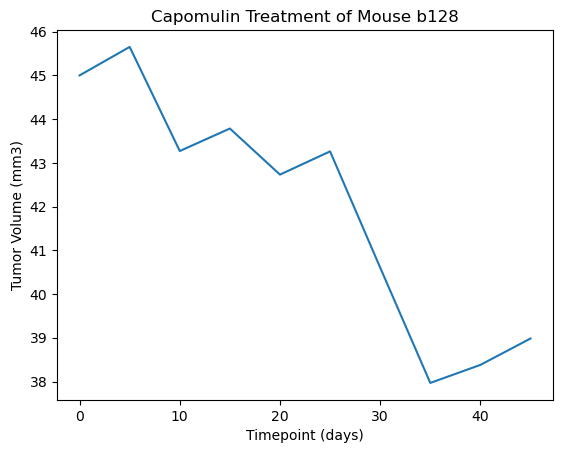

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_b128 = mouse_data_new[mouse_data_new["Mouse ID"] == "b128"]
x_axis = capomulin_mouse_b128["Timepoint"].unique()
y_axis = capomulin_mouse_b128["Tumor Volume (mm3)"].unique()

plt.plot(x_axis,y_axis)
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_1289/1908032148.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x_axis = capomulin_all.groupby(["Mouse ID"]).mean()


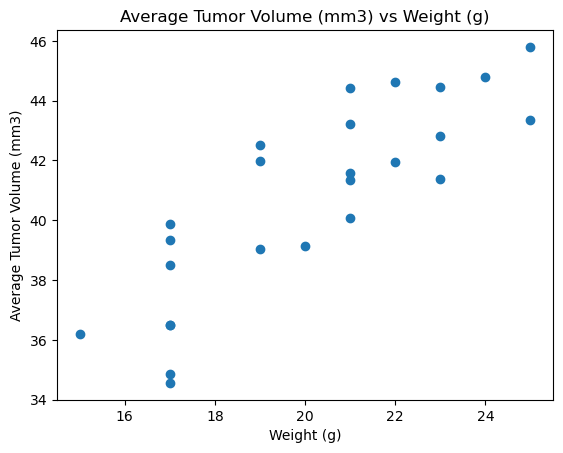

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_all = mouse_data_new[mouse_data_new["Drug Regimen"]== "Capomulin"]
x_axis = capomulin_all.groupby(["Mouse ID"]).mean()
x = x_axis["Weight (g)"]
y = x_axis["Tumor Volume (mm3)"]

plt.scatter(x, y)
plt.title("Average Tumor Volume (mm3) vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


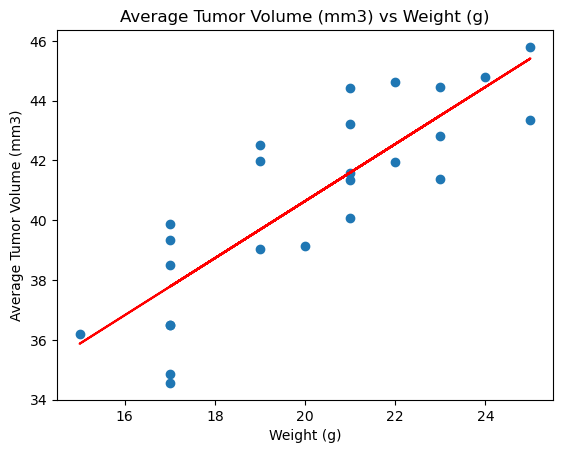

In [105]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

results = st.linregress(x,y)
rvalue = round(results.rvalue, 2)
regress_values = x * results.slope + results.intercept

print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.title("Average Tumor Volume (mm3) vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()